In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("data/train_data.csv", parse_dates=["block_time"])

In [4]:
features = [f for f in train_data.columns if f.endswith("_log_to_median_ratio")]

In [5]:
len(features)

53

In [6]:
from sklearn.feature_selection import mutual_info_classif

In [7]:
target_data = train_data.loc[train_data["label"] == 1, :]
ref_sample = train_data.loc[train_data["label"] == 0, :].sample(15000)
train_sample = pd.concat([ref_sample, target_data], axis=0).reset_index(drop=True)

In [15]:
mu_score = mutual_info_classif(
    train_sample.loc[:, features].fillna(0), train_sample["label"]
)

In [20]:
mu_score_df = pd.DataFrame(
    zip(features, mu_score), columns=["feature", "score"]
).sort_values("score", ascending=False)

In [22]:
mu_score_df.to_csv("mu_score.csv", index=False)

In [19]:
train_sample.shape

(16671, 116)

In [71]:
selected = [
    "snd_rcv_amt_usd_sum_tx_sum_log_to_median_ratio",
    "snd_rcv_amt_usd_sum_tx_max_log_to_median_ratio",
    "snd_rcv_mean_time_diff_sec_tx_median_log_to_median_ratio",
    "snd_rcv_life_time_sec_tx_min_log_to_median_ratio",
    "snd_rcv_tkn_type_cnt_tx_max_log_to_median_ratio",
    "gas_limit_log_to_median_ratio",
]

In [86]:
train_data_no_nans = train_data.loc[
    ~train_data.loc[:, selected].isna().sum(axis=1).astype(bool), :
]

In [72]:
import seaborn as sns

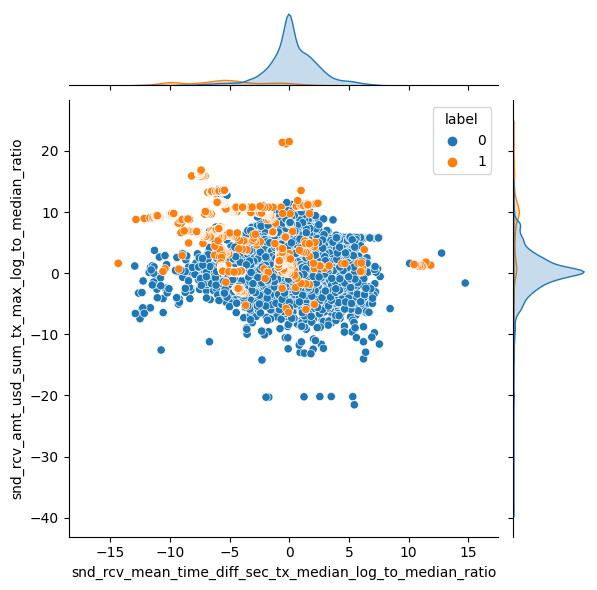

In [73]:
sns.jointplot(
    data=train_sample,
    y="snd_rcv_amt_usd_sum_tx_max_log_to_median_ratio",
    x="snd_rcv_mean_time_diff_sec_tx_median_log_to_median_ratio",
    hue="label",
)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [87]:
model = LogisticRegression(class_weight="balanced").fit(
    train_data_no_nans.loc[:, selected], train_data_no_nans["label"]
)
# model = RandomForestClassifier(max_depth=5).fit(train_data.loc[:, selected].fillna(0), train_data['label'])

In [88]:
pred_label = model.predict(train_data_no_nans.loc[:, selected])

In [78]:
import scikitplot as skplt

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

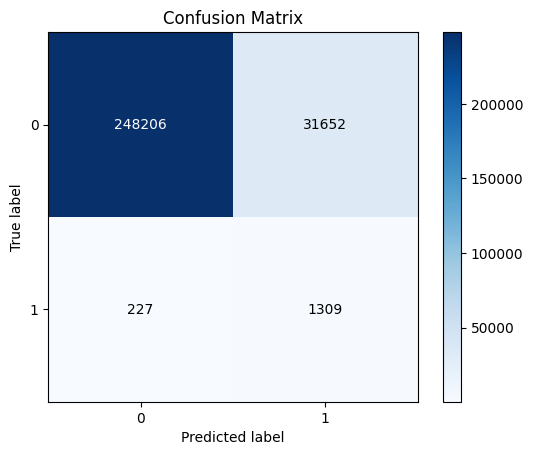

In [90]:
skplt.metrics.plot_confusion_matrix(train_data_no_nans["label"], pred_label)

In [91]:
1309 / (1309 + 227)

0.8522135416666666

In [92]:
1309 / (1309 + 31652)

0.03971360092230211

In [59]:
validation_data = pd.read_csv("data/validation_data.csv", parse_dates=["block_time"])

In [93]:
val_data_no_nans = validation_data.loc[
    ~validation_data.loc[:, selected].isna().sum(axis=1).astype(bool), :
]

In [95]:
val_pred_label = model.predict(val_data_no_nans.loc[:, selected])

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

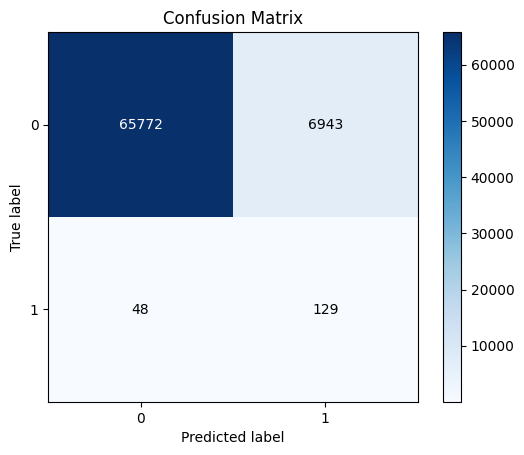

In [96]:
skplt.metrics.plot_confusion_matrix(val_data_no_nans["label"], val_pred_label)

In [97]:
129 / (129 + 48)

0.7288135593220338

In [98]:
129 / (129 + 6943)

0.018240950226244345

In [99]:
model.coef_

array([[ 0.22165371,  0.18742858, -0.30987376, -0.14625316, -0.11233344,
        -0.4400687 ]])

In [100]:
selected

['snd_rcv_amt_usd_sum_tx_sum_log_to_median_ratio',
 'snd_rcv_amt_usd_sum_tx_max_log_to_median_ratio',
 'snd_rcv_mean_time_diff_sec_tx_median_log_to_median_ratio',
 'snd_rcv_life_time_sec_tx_min_log_to_median_ratio',
 'snd_rcv_tkn_type_cnt_tx_max_log_to_median_ratio',
 'gas_limit_log_to_median_ratio']